In [2]:
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
def parse_annotations(xml_file):
    """Parse the XML file and extract bounding box and label information."""
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    filename = root.find('filename').text
    objects = []
    
    for obj in root.findall('object'):
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(float(bndbox.find('xmin').text))
        ymin = int(float(bndbox.find('ymin').text))
        xmax = int(float(bndbox.find('xmax').text))
        ymax = int(float(bndbox.find('ymax').text))
        objects.append((name, xmin, ymin, xmax, ymax))
    
    return filename, objects

def plot_image_with_annotations(image_path, objects):
    """Plot the image with bounding boxes and labels using matplotlib."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at path: {image_path}")
        return

    # Convert the image from BGR to RGB format for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create a figure and axis
    fig, ax = plt.subplots(1, figsize=(20, 20))
    ax.imshow(image_rgb)
    
    for (name, xmin, ymin, xmax, ymax) in objects:
        # Create and add the rectangle
        rect = patches.Rectangle((xmin, ymin), (xmax - xmin), (ymax - ymin), linewidth=1, edgecolor='white', facecolor='none')
        ax.add_patch(rect)
        
        # Add the label text inside the rectangle
        text_x = xmin
        text_y = ymin - 5  # Adjust position to be slightly above the rectangle
        ax.text(text_x, text_y, name, color='white', fontsize=8, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

    # Display the plot
    plt.axis('off')
    plt.show()
    
def main(xml_file, image_path):
    """Main function to parse annotations and plot the image with annotations."""
    _, objects = parse_annotations(xml_file)
    plot_image_with_annotations(image_path, objects)

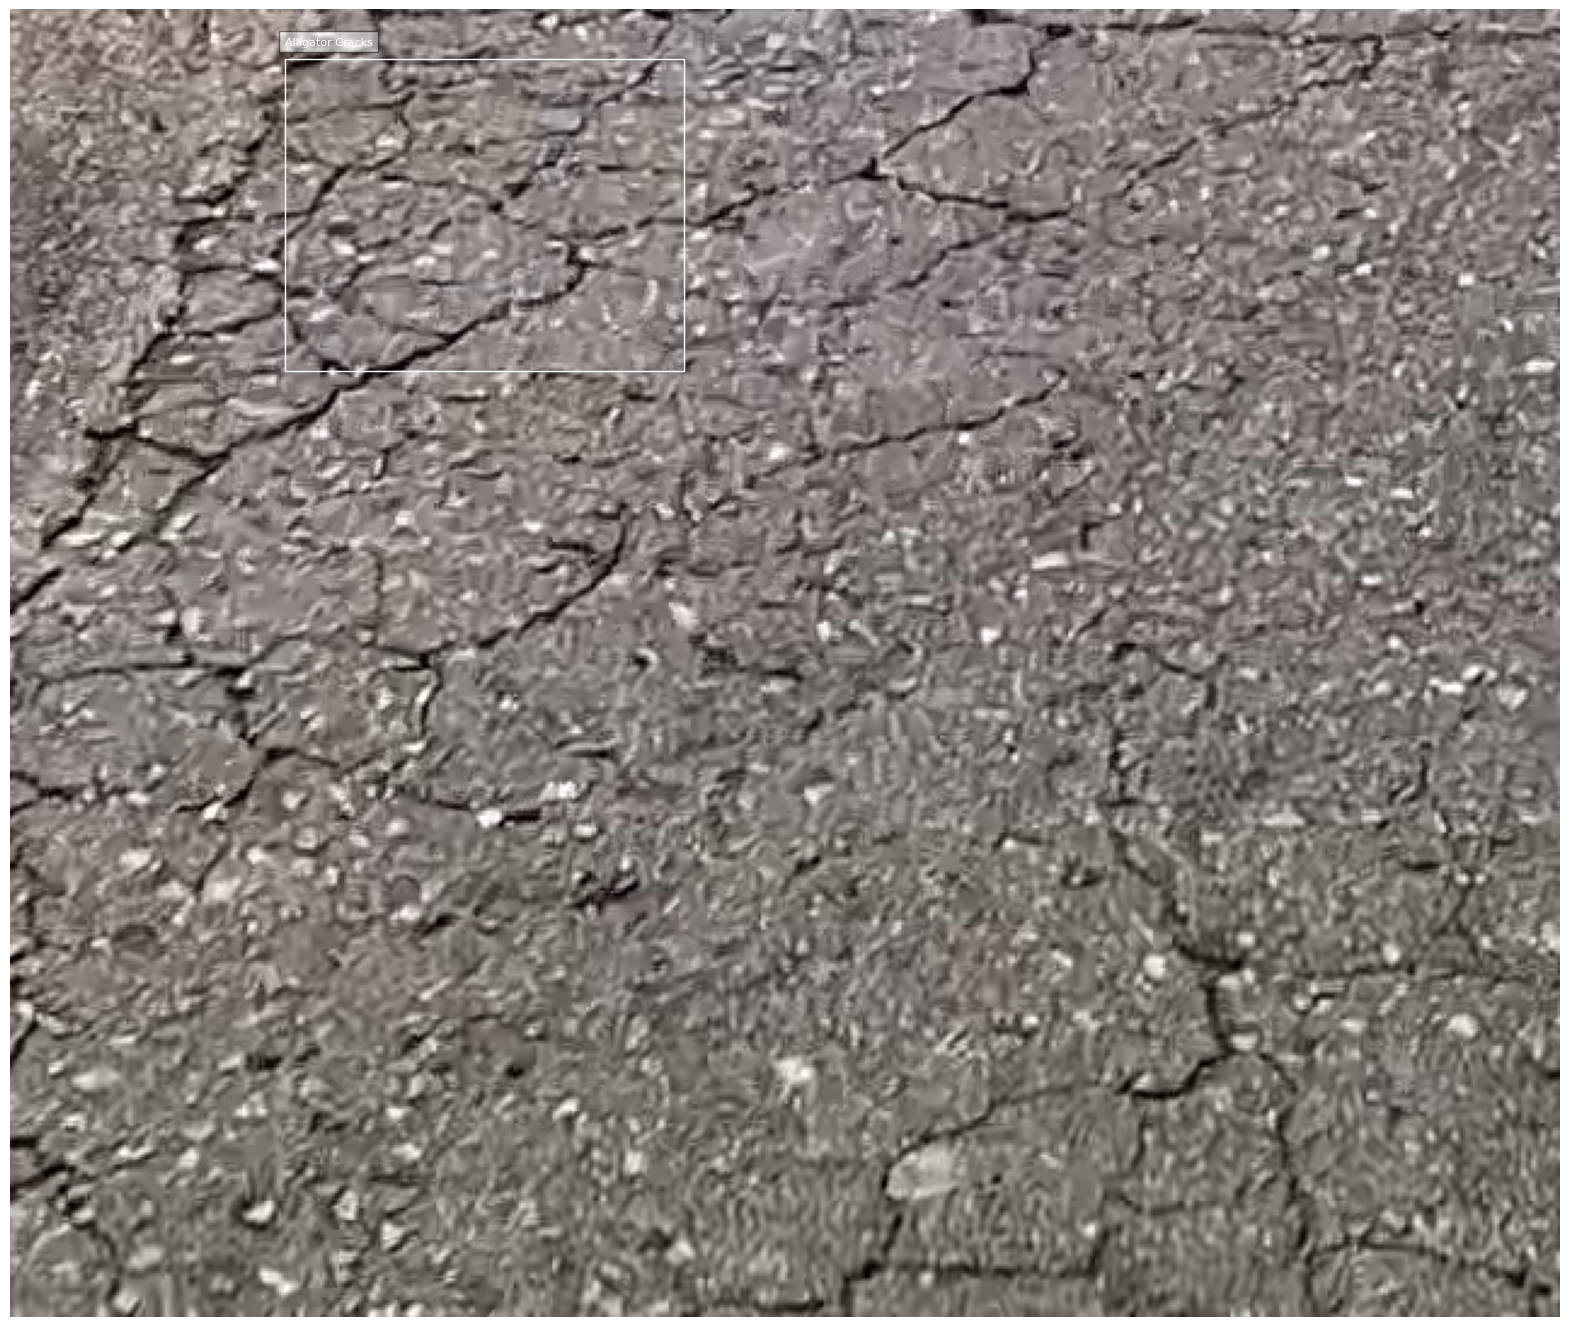

In [4]:
# Run the main function with the XML file and image path
if __name__ == "__main__":
    xml_file = 'D:/python/tcc1/test_annotations/GX010061.MP4_frame_11_part_3_2.xml'
    image_path = 'D:/python/tcc1/test_images/GX010061.MP4_frame_11_part_3_2.png'  # Update this with the actual path to your image
    main(xml_file, image_path)